## Fokker-Planck Shooter
For convenience the key equations are given below from https://arxiv.org/pdf/astro-ph/9407016.pdf:

1) Fokker-Planck equation
$$    \frac{\partial P(\varphi,t)}{\partial t} = \frac{1}{3H}\frac{\partial}{\partial \varphi}\left(V'(\varphi) P(\varphi,t)\right) + \frac{H^3}{8\pi^2}\frac{\partial^2 P(\varphi,t)}{\partial \varphi^2} $$

2) Schrodinger-like equation
$$     -\frac{1}{2}\frac{\partial^2 \Phi_n(\varphi)}{\partial \varphi^2} + W(\varphi) \Phi_n (\varphi) = \frac{4\pi^2\Lambda_n}{H^3}\Phi_n(\varphi) $$

3) Effective potential
$$ W(\varphi) = \frac{1}{2}\left[v'(\varphi)^2-v''(\varphi)\right], \> \> v(\varphi) = \frac{4\pi^2}{3H^4} V(\varphi) $$

4) Solutions take the form
$$ P(\varphi,t) = \exp\left(-\frac{4\pi^2 V(\varphi)}{3H^4}\right) \sum^{\infty}_{n=0} a_n \Phi_n (\varphi) e^{-\Lambda_n (t-t_0)} $$

In [1]:
import numpy as np
from math import factorial, ceil
from scipy import optimize
from scipy.integrate import odeint, simps
from scipy.special import eval_hermite
import matplotlib.pyplot as plt
%matplotlib inline

### Defining key parameters

In [2]:
hubble_rate = 1
mass = 1
mass_squared = mass**2
self_coupling = 0

### Quadratic potential
Here we define a potential 
$$ V(\varphi) = \frac{1}{2} m^2 \varphi^2, $$
with effective potential
$$ W(\varphi) = m^2\frac{2\pi^2}{3H^4}\left[\frac{4\pi^2}{3H^4} m^2 \varphi^2 - 1\right] $$
The eigenvalues have been determined in https://arxiv.org/pdf/1904.11917.pdf for the free limit to be
$$ \Lambda_n = \frac{n}{3}\frac{m^2}{H} $$

In [3]:
# Field 
field = np.linspace(0, 100, 30000)

# Effective potential
def effective_potential(field):
    '''Defines the effective potential in the SL equation
    field: Field value'''
    
    W = mass_squared*((2*np.pi**2)/(3*hubble_rate**4))*(((4*np.pi**2)/(3*hubble_rate**4))*mass_squared*field**2 - 1)
    return W

Below we rewrite the Schrodinger-like equation as a coupled system of ODEs which we then use the ``odeint`` function to integrate.
$$ \frac{\partial \Phi_n(\varphi)}{\partial \varphi} = Y $$
$$     \frac{\partial Y}{\partial \varphi} = 2 W(\varphi) \Phi_n (\varphi) - \frac{8\pi^2\Lambda_n}{H^3}\Phi_n(\varphi) $$

In [4]:
# Schrodinger-like coupled ODEs
def schrodinger_like_ODE(V, field):
    '''Computes the second derivative of the SL equation
    V: array where first entry is the eigenfunction, second is Y
    as defined above
    field: field values'''
    
    # Empty array for derivatives
    dV = np.zeros(2)
    
    # Computes derivatives
    dV[0] = V[1]
    dV[1] = V[0]*(2*effective_potential(field) - (8*eigenvalue*np.pi**2)/(hubble_rate**3))
    return dV

We start with $n=0$ for the eigenvalue. We also create two arrays ``V_even`` and ``V_odd`` which serve as the starting conditions for even and odd $\Phi_n$, respectively.

In [5]:
# Eigenvalue
def quadratic_eigenvalue(n):
    '''Computes the eigenvalue for the quadratic case for a given n
    n: eigenfunction label'''
    
    # Eigenvalue
    q = (n/3)*(mass_squared/hubble_rate)
    return q

eigenvalue = quadratic_eigenvalue(0)

# Starting conditions for the even and odd functions
V_even = np.array([1,0])
V_odd = np.array([0,1])

# Integrates Schrodinger-like equation
V_0 = odeint(schrodinger_like_ODE, V_even, field)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
//anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Now lets change $n$ slightly so we undershoot and overshoot.

In [6]:
# Changing n
eigenvalue = quadratic_eigenvalue(0.1)
# Integrates SL equation
V_0p = odeint(schrodinger_like_ODE, V_even, field)

# Changing n
eigenvalue = quadratic_eigenvalue(-0.1)
# Integrates SL equation
V_0m = odeint(schrodinger_like_ODE, V_even, field)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]


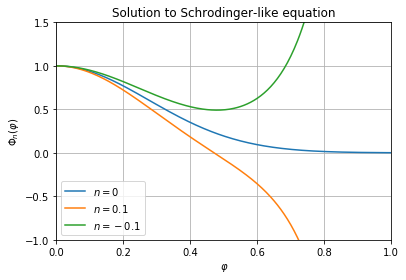

In [7]:
# Plotting
plt.grid()
plt.ylim(-1, 1.5)
plt.xlim(0, 1)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field ,V_0[:,0], label="$n=0$")
plt.plot(field, V_0p[:,0], label="$n=0.1$")
plt.plot(field, V_0m[:,0], label="$n=-0.1$")
plt.legend()

Let us now try the next eigenvalue with $n=1$ and an odd initial condition.

In [8]:
# Changing n
eigenvalue = quadratic_eigenvalue(1)
# Integrates SL equation
V_1 = odeint(schrodinger_like_ODE, V_odd, field)

# Changing n
eigenvalue = quadratic_eigenvalue(1.1)
# Integrates SL equation
V_1p = odeint(schrodinger_like_ODE, V_odd, field)

# Changing n
eigenvalue = quadratic_eigenvalue(0.9)
# Integrates SL equation
V_1m = odeint(schrodinger_like_ODE, V_odd, field)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]


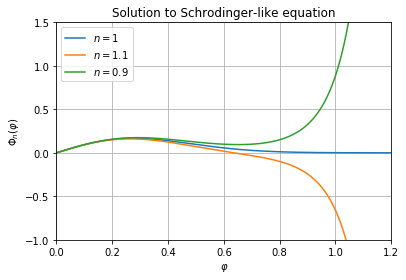

In [9]:
# Plotting
plt.grid()
plt.ylim(-1, 1.5)
plt.xlim(0, 1.2)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field, V_1[:,0], label="$n=1$")
plt.plot(field, V_1p[:,0], label="$n=1.1$")
plt.plot(field, V_1m[:,0], label="$n=0.9$")
plt.legend()

Now for $n=2$. 

In [10]:
# Changing n
eigenvalue = quadratic_eigenvalue(2)
# Integrates SL equation
V_2 = odeint(schrodinger_like_ODE, V_even, field)

# Changing n
eigenvalue = quadratic_eigenvalue(2.1)
# Integrates SL equation
V_2p = odeint(schrodinger_like_ODE , V_even, field)

# Changing n
eigenvalue = quadratic_eigenvalue(1.9)
# Integrates SL equation
V_2m = odeint(schrodinger_like_ODE, V_even, field)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]


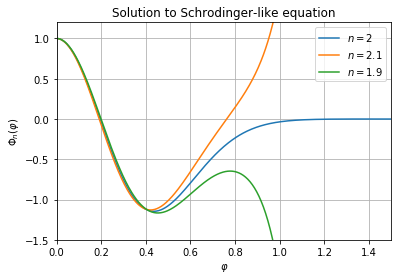

In [11]:
# Plotting
plt.grid()
plt.ylim(-1.5, 1.2)
plt.xlim(0, 1.5)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field, V_2[:,0], label="$n=2$")
plt.plot(field, V_2p[:,0], label="$n=2.1$")
plt.plot(field, V_2m[:,0], label="$n=1.9$")
plt.legend()

## Normalisation condition
In order to ensure the eigenfunctions are normalised we need ensure their square integral is unity so that
$$ 1 = \int \Phi^*_n \Phi_n d\varphi $$
Since the eigenfunctions we intially consider are even or odd it is straightforward to compute the other half once we integrated the first half. This involves reflecting the field and eigenfunctions. We do this below. 

In [12]:
# Computes the full eigenfunction based on the its symmetry
def full_eigenfunction(field, eigenfunction, parity):
    '''Determines the full eigenfunction based on the parity of the eigenfunction.
    Only applies in the case of symmetric potentials.
    field: half of the field values over which we integrated
    eigenfunction: integrated eigenfunction
    parity: variable determining the symmetry of the eigenfunction. 1 indicates
    even, -1 indicates odd'''
    
    # Checks to see if parity is a valid value
    if parity**2 == 1:
        # Determines the full range of field values
        field_reflection = -np.flip(field[1:])
        field = np.append(field_reflection, field)
    
        # Determines full eigenfunction for the full range of field values
        eigenfunction_reflection = parity*np.flip(eigenfunction[1:])
        eigenfunction = np.append(eigenfunction_reflection, eigenfunction)

        return field, eigenfunction

# Determines full eigenfunctions
field_full, V_0 = full_eigenfunction(field[:450], V_0[:450,0], 1)
field_full, V_1 = full_eigenfunction(field[:450], V_1[:450,0], -1)
field_full, V_2 = full_eigenfunction(field[:450], V_2[:450,0], 1)

In [13]:
# Integration interval as defined in the normalisation condition
dphi = field_full[1] - field_full[0]

# Normalisation constants
N_0 = np.sqrt(simps(V_0**2, field_full, dphi))
N_1 = np.sqrt(simps(V_1**2, field_full, dphi))
N_2 = -np.sqrt(simps(V_2**2, field_full, dphi))

# Normalisation
V_0 = V_0/N_0
V_1 = V_1/N_1
V_2 = V_2/N_2

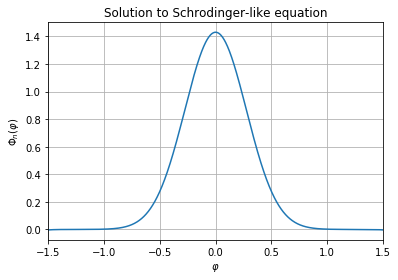

In [14]:
# Plotting 
plt.grid()
plt.xlim(-1.5, 1.5)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field_full, V_0)

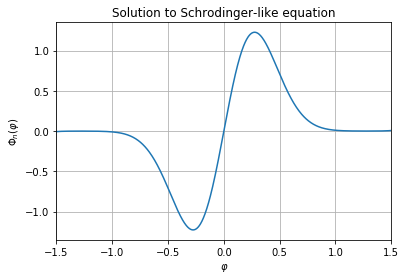

In [15]:
# Plotting
plt.grid()
plt.xlim(-1.5, 1.5)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field_full, V_1)

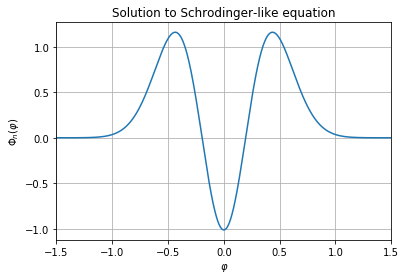

In [16]:
# Plotting
plt.grid()
plt.xlim(-1.5, 1.5)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field_full, V_2)

## Analytic solutions
The analytic solution for the quadratic potential is given in https://arxiv.org/pdf/1904.11917.pdf. These are analogous to the wavefunction for the harmonic oscillator.
$$ \Phi_n = \frac{\sqrt{m}}{H}\frac{1}{\sqrt{2^n n!}}\left(\frac{4\pi}{3}\right)^{1/4}e^{-\frac{2\pi^2 \tilde{x}^2}{3}}H_n\left(\frac{2\pi\tilde{x}}{\sqrt{3}}\right),$$
where $H_n$ are the Hermite polynomials and 
$$\tilde{x} = \frac{m}{H^2}\varphi. $$

In [17]:
def analytic_solution(n, field):
    '''Determines the analytic solution for the quadratic potential
    n: eigenfunction label
    field: field values'''
    
    # x~ as defined above
    x_tilde = (mass/hubble_rate**2)*field
    
    # Eigenfunction
    phi_n = (np.sqrt(mass)/(hubble_rate*np.sqrt((2**n)*factorial(n))))*((4*np.pi/3)**0.25)*np.exp(-2*((np.pi*x_tilde)**2)/3)*eval_hermite(n, 2*np.pi*x_tilde/np.sqrt(3))
    
    return phi_n


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


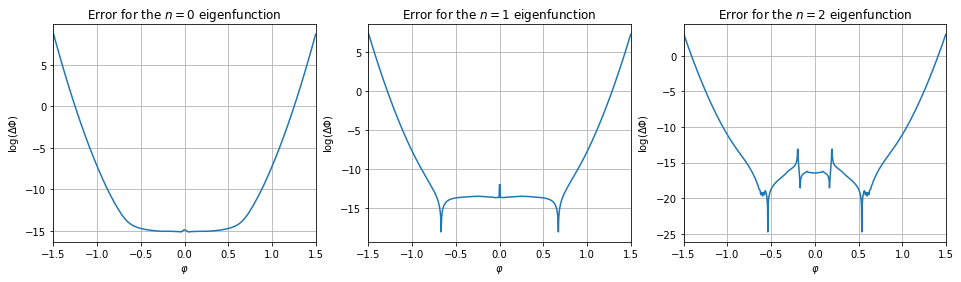

In [18]:
# Analytic solutions for n = 0,1,2
analytic_0 = analytic_solution(0, field_full)
analytic_1 = analytic_solution(1, field_full)
analytic_2 = analytic_solution(2, field_full)

# Calculates errors
error_0 = np.log(abs((V_0 - analytic_0)/analytic_0))
error_1 = np.log(abs((V_1 - analytic_1)/analytic_1))
error_2 = np.log(abs((V_2 - analytic_2)/analytic_2))

# Plotting error
fig = plt.figure(figsize=(16, 4))

# n = 0 eigenfunction
ax0 = fig.add_subplot(1,3,1)
ax0.grid()
ax0.set_title("Error for the $n=0$ eigenfunction")
ax0.set_ylabel("log($\Delta\Phi$)")
ax0.set_xlabel("$\\varphi$")
ax0.set_xlim(-1.5, 1.5)
ax0.plot(field_full, error_0)

# n = 1 eigenfunction
ax1 = fig.add_subplot(1,3,2)
ax1.grid()
ax1.set_title("Error for the $n=1$ eigenfunction")
ax1.set_ylabel("log($\Delta\Phi$)")
ax1.set_xlabel("$\\varphi$")
ax1.set_xlim(-1.5, 1.5)
ax1.plot(field_full, error_1)

# n = 2 eigenfunction
ax2 = fig.add_subplot(1,3,3)
ax2.grid()
ax2.set_title("Error for the $n=2$ eigenfunction")
ax2.set_ylabel("log($\Delta\Phi$)")
ax2.set_xlabel("$\\varphi$")
ax2.set_xlim(-1.5, 1.5)
ax2.plot(field_full, error_2)

## Bisection eigenvalue finder
Here we make use of the interval bisection algorithm to compute eigenvalues numerically. The approach begins by choosing an interval an eigenvalue is believed to lie. If we say that the eigenvalue lies between $\Lambda_a$ and $\Lambda_b$, we consider the solutions at these two eigenvalues and their midpoint $\Lambda_c =(\Lambda_a + \Lambda_b)/2$. For some suitably large field value we determine whether the sign of the eigenfunction is positive or negative for these three points. We narrow down the interval by determining where a change of sign occurs. If say $\Lambda_a$ gave a solution diverging to $-\infty$ while $\Lambda_c$ diverged to $\infty$ then we set these two values to be the new interval and then evaluate the new midpoint. We repeat the process until we reach the desired tolerance. 

In [19]:
# Bisection eigenvalue finder
class bisection_method:
    '''Bisection eigenvalue solver including an ODE method for the
    coupled ODE system for the Schrodinger-like equation discussed
    previously and a bisection loop to find eigenvalues.'''
    
    def __init__(self, interval):
        '''Initialization of eigenvalues where the bracketed eigenvalues
        are assigned as attributes.
        interval: two element array where the first entry is the lower 
        eigenvalue and the second element is the higher eigenvalue'''
        
        # Setting up initial trial eigenvalues
        self.low_eigenvalue = interval[0]
        self.high_eigenvalue = interval[1]
        self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
    
    def schrodinger_like_ODE(self, V, field):
        '''Computes the derivatives of the Schrodinger-like equation
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        field: field values'''
    
        # Empty array for derivatives
        dV = np.zeros(2)
    
        # Computes derivatives
        dV[0] = V[1]
        dV[1] = V[0]*(2*effective_potential(field) - (8*self.eigenvalue*np.pi**2)/(hubble_rate**3))
        return dV
    
    def bisection_loop(self, V, field, tolerance, max_iterations):
        '''Implements the bisection method to compute eigenvalues. The
        algorithm is designed to determine which side of the midpoint 
        the sign of the solution changes and then narrow down the interval 
        until suitable tolerance is reached.
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        field: field values
        tolerance: determines how close to zero the solutions should reach 
        to be deemed to have converged sufficiently
        max_iterations: caps the number of iterations the loop undergoes
        in the event the tolerance is not reached'''
        
        # Initial low eigenvalue and its solution
        self.eigenvalue = self.high_eigenvalue
        V_high = odeint(self.schrodinger_like_ODE, V, field)
    
        # Initial high eigenvalue and its solution
        self.eigenvalue = self.low_eigenvalue
        V_low = odeint(self.schrodinger_like_ODE, V, field)
    
        # Initial midpoint eigenvalue and its solution
        self.eigenvalue = self.new_eigenvalue
        V_new = odeint(self.schrodinger_like_ODE, V, field)
        
        # Initializing number of iterations
        iterations = 0
        # Loop that runs until we hit the desired tolerance or max_iterations is exceeded
        while self.high_eigenvalue - self.low_eigenvalue > tolerance:
            # Checks to see which boundary eigenvalue gives positive or negative diverging solutions
            if V_high[-1,0] > V_new[-1,0] > V_low[-1,0]:
                # Checks if the midpoint eigenvalue gives negatively diverging solutions
                if V_new[-1,0] < 0:                    
                    # Sets eigenvalue c to be eigenvalue a, likewise for the solutions
                    V_low = V_new
                    self.low_eigenvalue = self.new_eigenvalue
                    
                    # Determines the new midpoint eigenvalue and its solutions
                    self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                    self.eigenvalue = self.new_eigenvalue
                    V_new = odeint(self.schrodinger_like_ODE, V, field)
                # Runs if the midpoint eigenvalue converges to positive infinity
                else:
                    # Sets eigenvalue c to be eigenvalue b, likewise for the solutions
                    V_high = V_new
                    self.high_eigenvalue = self.new_eigenvalue
                    
                    # Determines the new midpoint eigenvalue and its solutions
                    self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                    self.eigenvalue = self.new_eigenvalue
                    V_new = odeint(self.schrodinger_like_ODE, V, field)
            # Runs if the higher eigenvalue gives negative diverging solutions while the lower gives the reverse
            else:
                # Checks if the midpoint eigenvalue gives negatively diverging solutions
                if V_new[-1,0] < 0:
                    # Sets eigenvalue c to be eigenvalue b, likewise for the solutions
                    V_high = V_new
                    self.high_eigenvalue = self.new_eigenvalue
                    
                    # Determines the new midpoint eigenvalue and its solutions
                    self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                    self.eigenvalue = self.new_eigenvalue
                    V_new = odeint(self.schrodinger_like_ODE, V, field)
                # Runs if the midpoint eigenvalue converges to positive infinity
                else:
                    # Sets eigenvalue c to be eigenvalue a, likewise for the solutions
                    V_low = V_new
                    self.low_eigenvalue = self.new_eigenvalue
                    
                    # Determines the new midpoint eigenvalue and its solutions
                    self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                    self.eigenvalue = self.new_eigenvalue
                    V_new = odeint(self.schrodinger_like_ODE, V, field)
            
            # Updates number of iterations
            iterations = iterations + 1
            # If max_iterations is exceeded the loop is stopped
            if iterations > max_iterations:
                break
            
        return self.new_eigenvalue, V_new

In [20]:
# Field 
field = np.linspace(0, 10, 3000)

# Tolerance
tolerance = 0.0000000001

# Running the bisection algorithm for
bisect = bisection_method([-0.1, 0.2])
eigenvalue_0, V_0 = bisect.bisection_loop(V_even, field, tolerance, 250)

In [21]:
# Running the bisection algorithm
bisect = bisection_method([0.1, 0.5])
eigenvalue_1, V_1 = bisect.bisection_loop(V_odd, field, tolerance, 250)

In [22]:
# Running the bisection algorithm
bisect = bisection_method([0.4, 0.7])
eigenvalue_2, V_2 = bisect.bisection_loop(V_even, field, tolerance, 250)

In [23]:
# Eigenvalues
print(eigenvalue_0, eigenvalue_1, eigenvalue_2)

-1.8742866814136507e-09 0.3333333602640778 0.6666666769306175


In [24]:
# Determines full eigenfunctions
field_full, V_0 = full_eigenfunction(field[:600], V_0[:600,0], 1)
field_full, V_1 = full_eigenfunction(field[:600], V_1[:600,0], -1)
field_full, V_2 = full_eigenfunction(field[:600], V_2[:600,0], 1)

In [25]:
# Integration interval as defined in the normalisation condition
dphi = field_full[1] - field_full[0]

# Normalisation constants
N_0 = np.sqrt(simps(V_0**2, field_full, dphi))
N_1 = np.sqrt(simps(V_1**2, field_full, dphi))
N_2 = -np.sqrt(simps(V_2**2, field_full, dphi))

# Normalisation
V_0 = V_0/N_0
V_1 = V_1/N_1
V_2 = V_2/N_2

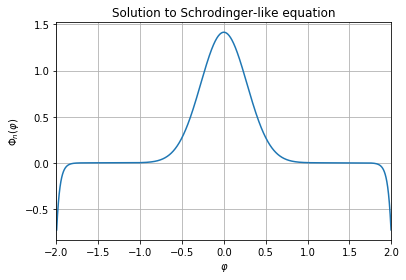

In [26]:
# Plotting 
plt.grid()
plt.xlim(-2, 2)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field_full, V_0)

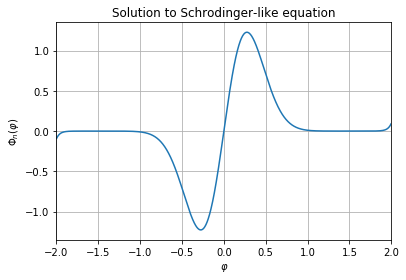

In [27]:
# Plotting
plt.grid()
plt.xlim(-2, 2)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field_full, V_1)

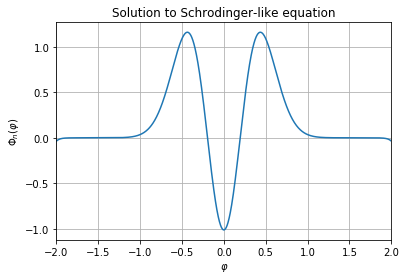

In [28]:
# Plotting
plt.grid()
plt.xlim(-2, 2)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field_full, V_2)

## Comparing the bisection solutions to the analytic result
Here we compute the percentage difference between the analytic results and those obtained through the bisection method. For each case as the error is generally quite small until the field values become large in magnitude. When this happens the analytic solution rapidly approaches zero and the error jumps to large large values.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


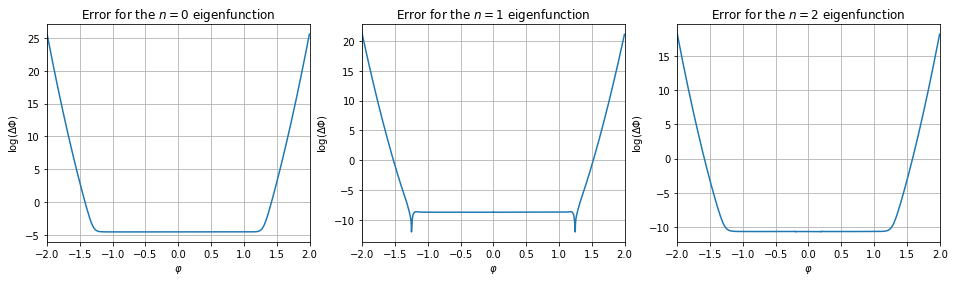

In [29]:
# Analytic solutions for n = 0,1,2
analytic_0 = analytic_solution(0, field_full)
analytic_1 = analytic_solution(1, field_full)
analytic_2 = analytic_solution(2, field_full)

# Calculates log of errors
error_0 = np.log(abs((V_0 - analytic_0)/analytic_0))
error_1 = np.log(abs((V_1 - analytic_1)/analytic_1))
error_2 = np.log(abs((V_2 - analytic_2)/analytic_2))

# Plotting error
fig = plt.figure(figsize=(16, 4))

# n = 0 eigenfunction
ax0 = fig.add_subplot(1,3,1)
ax0.grid()
ax0.set_title("Error for the $n=0$ eigenfunction")
ax0.set_ylabel("log($\Delta\Phi$)")
ax0.set_xlabel("$\\varphi$")
ax0.set_xlim(-2, 2)
ax0.plot(field_full, error_0)

# n = 1 eigenfunction
ax1 = fig.add_subplot(1,3,2)
ax1.grid()
ax1.set_title("Error for the $n=1$ eigenfunction")
ax1.set_ylabel("log($\Delta\Phi$)")
ax1.set_xlabel("$\\varphi$")
ax1.set_xlim(-2, 2)
ax1.plot(field_full, error_1)

# n = 2 eigenfunction
ax2 = fig.add_subplot(1,3,3)
ax2.grid()
ax2.set_title("Error for the $n=2$ eigenfunction")
ax2.set_ylabel("log($\Delta\Phi$)")
ax2.set_xlabel("$\\varphi$")
ax2.set_xlim(-2, 2)
ax2.plot(field_full, error_2)

## Plotting $\Phi_n(\Lambda_n)$
In order to determine what other methods might be useful for finding solutions. We first plot the function $\Phi_n(\Lambda_n)$ for $\varphi=10$.

In [30]:
class eigenfunction_finder:
    '''Class for finding the eigenfunction for a given eigenvalue'''
    def __init__(self, eigenvalue):
        '''Assigns the eigenvalue as an attribute'''
        self.eigenvalue = eigenvalue
        
    def schrodinger_like_ODE(self, V, field):
        '''Computes the derivatives of the Schrodinger-like equation
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        field: field values'''
    
        # Empty array for derivatives
        dV = np.zeros(2)

        # Computes derivatives
        dV[0] = V[1]
        dV[1] = V[0]*(2*effective_potential(field) - (8*self.eigenvalue*np.pi**2)/(hubble_rate**3))
        return dV

In [31]:
# Field 
field = np.linspace(0, 10, 3000)

# Range of eigenvalues for plot
eigenvalues_0 = np.linspace(-0.1, 0.1, 100)

# Array to store solutions
V_0 = np.zeros((len(eigenvalues_0), len(field), 2))

# Loops over the eigenvalues and fills array with solution for each eigenvalue
for i in range(len(eigenvalues_0)):    
    eigenfunction = eigenfunction_finder(eigenvalues_0[i])
    V_0[i] = odeint(eigenfunction.schrodinger_like_ODE, V_even, field)

Text(0, 0.5, '$\\Phi_0$')

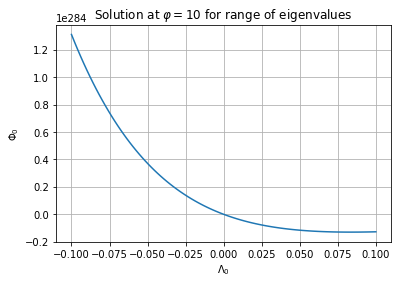

In [32]:
# Plotting
plt.grid()
plt.plot(eigenvalues_0, V_0[:,-1,0])
plt.title("Solution at $\\varphi=10$ for range of eigenvalues")
plt.xlabel("$\Lambda_0$")
plt.ylabel("$\Phi_0$")

## False position method
As with bisection we evaluate the function in a chosen interval. Instead of choosing the midpoint as our next point of evaluation we approximate the function as linear between the two points and then find the root of the line that connects the two points. We evaluate the function at the crossing point and use this as our next point. We repeat the process until a suitable convergence is reached.
$$ \Lambda_{n+1} = \Lambda_n - \Phi(\Lambda_n) \frac{\delta \Lambda}{\delta \Phi}. $$
Note the subscript $n$ in this case is an iteration label rather than an indicator of which eigenfunction/eigenvalue we are trying to find.
## Ridders' Method
In order to improve on false position we can also consider the midpoint of the interval such that $\Lambda_1 = (\Lambda_0 + \Lambda_2)/2$. Evaluating the eigenfunction at each of these points we may define a term $e^{md}$ that satisfies 
$$f(\Lambda_2)e^{2md} - 2 f(\Lambda_1)e^{md} + f(\Lambda_0) = 0, $$
with $d = \Lambda_2 - \Lambda_1 = \Lambda_1 - \Lambda_0$. The equation is quadratic and thus solvable for $e^{md}$. Applying the false position method for $f(\Lambda_2)e^{2md}, f(\Lambda_1)e^{md}, f(\Lambda_0)$ gives us
$$\Lambda_3 = \Lambda_1 + (\Lambda_1 - \Lambda_0)\frac{f(\Lambda_1)/f(\Lambda_0)}{\sqrt{[f(\Lambda_1)/f(\Lambda_0)]^2 - f(\Lambda_2)/f(\Lambda_0)}}. $$
More details can be found at https://pdfs.semanticscholar.org/ee96/ac61943bcf8d1ea6356fd0306fdde93b2eb7.pdf?_ga=2.74617489.2039502697.1605300444-519346107.1605300444.

In [33]:
class root_finder:
    '''Root finding class with the aforementioned
    algorithms implemented as methods'''
    def __init__(self, interval):
        '''Initialization of eigenvalues where the bracketed eigenvalues
        are assigned as attributes.
        interval: two element array where the first entry is the lower 
        eigenvalue and the second element is the higher eigenvalue'''
        
        # Setting up initial trial eigenvalues
        self.initial_low_eigenvalue = interval[0]
        self.initial_high_eigenvalue = interval[1]
    
    def effective_potential(self, field):
        '''Defines the effective potential in the SL equation
        field: field value'''
    
        W = mass_squared*((2*np.pi**2)/(3*hubble_rate**4))*(((4*np.pi**2)/(3*hubble_rate**4))*mass_squared*field**2 - 1)
        return W
    
    def schrodinger_like_ODE(self, V, field):
        '''Computes the derivatives of the Schrodinger-like equation
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        field: field values'''
    
        # Empty array for derivatives
        dV = np.zeros(2)

        # Computes derivatives
        dV[0] = V[1]
        dV[1] = V[0]*(2*self.effective_potential(field) - (8*self.eigenvalue*np.pi**2)/(hubble_rate**3))
        return dV
            
    def bisection_loop(self, V, field, tolerance, max_iterations):
        '''Implements the bisection method to compute eigenvalues. The
        algorithm is designed to determine which side of the midpoint 
        the sign of the solution changes and then narrow down the interval 
        until suitable tolerance is reached.
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        field: field values
        tolerance: determines how close to zero the solutions should reach 
        to be deemed to have converged sufficiently
        max_iterations: caps the number of iterations the loop undergoes
        in the event the tolerance is not reached'''
        
        # Initial low eigenvalue and its solution
        self.high_eigenvalue = self.initial_high_eigenvalue
        self.eigenvalue = self.high_eigenvalue
        V_high = odeint(self.schrodinger_like_ODE, V, field)
        self.function_calls_bisect = 1
    
        # Initial high eigenvalue and its solution
        self.low_eigenvalue = self.initial_low_eigenvalue
        self.eigenvalue = self.low_eigenvalue
        V_low = odeint(self.schrodinger_like_ODE, V, field)
        self.function_calls_bisect += 1
    
        # Initial midpoint eigenvalue and its solution
        self.new_eigenvalue = 0.5*(self.high_eigenvalue + self.low_eigenvalue)
        self.eigenvalue = self.new_eigenvalue
        V_new = odeint(self.schrodinger_like_ODE, V, field)
        self.function_calls_bisect += 1
        
        # Initializing number of iterations
        iterations = 0
        # Loop that runs until we hit the desired tolerance or max_iterations is exceeded
        while self.high_eigenvalue - self.low_eigenvalue > tolerance:
            # Checks to see which boundary eigenvalue gives positive or negative diverging solutions
            if V_high[-1,0] > V_new[-1,0] > V_low[-1,0]:
                # Checks if the midpoint eigenvalue gives negatively diverging solutions
                if V_new[-1,0] < 0:                    
                    # Sets eigenvalue c to be eigenvalue a, likewise for the solutions
                    V_low = V_new
                    self.low_eigenvalue = self.new_eigenvalue
                    
                    # Determines the new midpoint eigenvalue and its solutions
                    self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                    self.eigenvalue = self.new_eigenvalue
                    V_new = odeint(self.schrodinger_like_ODE, V, field)
                    self.function_calls_bisect += 1
                    
                # Runs if the midpoint eigenvalue converges to positive infinity
                else:
                    # Sets eigenvalue c to be eigenvalue b, likewise for the solutions
                    V_high = V_new
                    self.high_eigenvalue = self.new_eigenvalue
                    
                    # Determines the new midpoint eigenvalue and its solutions
                    self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                    self.eigenvalue = self.new_eigenvalue
                    V_new = odeint(self.schrodinger_like_ODE, V, field)
                    self.function_calls_bisect += 1
                    
            # Runs if the higher eigenvalue gives negative diverging solutions while the lower gives the reverse
            else:
                # Checks if the midpoint eigenvalue gives negatively diverging solutions
                if V_new[-1,0] < 0:
                    # Sets eigenvalue c to be eigenvalue b, likewise for the solutions
                    V_high = V_new
                    self.high_eigenvalue = self.new_eigenvalue
                    
                    # Determines the new midpoint eigenvalue and its solutions
                    self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                    self.eigenvalue = self.new_eigenvalue
                    V_new = odeint(self.schrodinger_like_ODE, V, field)
                    self.function_calls_bisect += 1
                    
                # Runs if the midpoint eigenvalue converges to positive infinity
                else:
                    # Sets eigenvalue c to be eigenvalue a, likewise for the solutions
                    V_low = V_new
                    self.low_eigenvalue = self.new_eigenvalue
                    
                    # Determines the new midpoint eigenvalue and its solutions
                    self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                    self.eigenvalue = self.new_eigenvalue
                    V_new = odeint(self.schrodinger_like_ODE, V, field)
                    self.function_calls_bisect += 1
            
            # Updates number of iterations
            iterations = iterations + 1
            # If max_iterations is exceeded the loop is stopped
            if iterations >= max_iterations:
                break
            
        return self.new_eigenvalue, V_new, iterations

    def false_position_loop(self, V, field, tolerance, max_iterations):
        '''Implements the false position method to compute eigenvalues.
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        field: field values
        tolerance: determines how close to zero the solutions should reach 
        to be deemed to have converged sufficiently
        max_iterations: caps the number of iterations the loop undergoes
        in the event the tolerance is not reached'''
        
        # Initial low eigenvalue and its solution
        self.high_eigenvalue = self.initial_high_eigenvalue
        self.eigenvalue = self.high_eigenvalue
        V_high = odeint(self.schrodinger_like_ODE, V, field)
        self.function_calls_false_position = 1
    
        # Initial high eigenvalue and its solution
        self.low_eigenvalue = self.initial_low_eigenvalue
        self.eigenvalue = self.low_eigenvalue
        V_low = odeint(self.schrodinger_like_ODE, V, field)
        self.function_calls_false_position += 1
        
        # Placeholder value for the eigenvalue
        self.new_eigenvalue = 1
        
        # Initializing number of iterations
        iterations = 0
        # Loop that runs until we hit the desired tolerance or max_iterations is exceeded
        while self.high_eigenvalue - self.low_eigenvalue > tolerance:
            # Computes gradient of line connecting the two points
            gradient = (V_high[-1,0] - V_low[-1,0])/(self.high_eigenvalue - self.low_eigenvalue)
            # Finds value for which line crosses x-axis
            self.new_eigenvalue = self.low_eigenvalue - V_low[-1,0]/gradient
            
            # Conditions check to which boundary is closest to the new value
            if self.high_eigenvalue - self.new_eigenvalue > self.new_eigenvalue - self.low_eigenvalue:
                # New value is now the low boundary
                self.low_eigenvalue = self.new_eigenvalue
                # Computes function for new boundary
                self.eigenvalue = self.low_eigenvalue
                V_low = odeint(self.schrodinger_like_ODE, V, field)
                self.function_calls_false_position += 1
                V_new = V_low
            else: 
                # New value is now the high boundary
                self.high_eigenvalue = self.new_eigenvalue
                # Computes function for new boundary
                self.eigenvalue = self.high_eigenvalue
                V_high = odeint(self.schrodinger_like_ODE, V, field)
                self.function_calls_false_position += 1
                V_new = V_high
            
            # Updates number of iterations
            iterations = iterations + 1
            # If max_iterations is exceeded the loop is stopped
            if iterations >= max_iterations:
                break
        
        return self.new_eigenvalue, V_new, iterations

    def ridder_loop(self, V, field, tolerance, max_iterations):
        '''Implements Ridders' method to compute eigenvalues.
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        field: field values
        tolerance: determines how close to zero the solutions should reach 
        to be deemed to have converged sufficiently
        max_iterations: caps the number of iterations the loop undergoes
        in the event the tolerance is not reached'''
        
        # Initial low eigenvalue and its solution
        self.high_eigenvalue = self.initial_high_eigenvalue
        self.eigenvalue = self.high_eigenvalue
        V_high = odeint(self.schrodinger_like_ODE, V, field)
        self.function_calls_ridder = 1
    
        # Initial high eigenvalue and its solution
        self.low_eigenvalue = self.initial_low_eigenvalue
        self.eigenvalue = self.low_eigenvalue
        V_low = odeint(self.schrodinger_like_ODE, V, field)
        self.function_calls_ridder += 1
        
        # Initial midpoint eigenvalue and its solution
        self.new_eigenvalue = 0.5*(self.high_eigenvalue + self.low_eigenvalue)
        self.eigenvalue = self.new_eigenvalue
        V_new = odeint(self.schrodinger_like_ODE, V, field)
        self.function_calls_ridder += 1
        
        # Initializing number of iterations
        iterations = 0
        # Loop that runs until we hit the desired tolerance or max_iterations is exceeded
        while self.high_eigenvalue - self.low_eigenvalue > tolerance:
            
            # Implements false position for the functions weighted by the exponential factors as explained in Ridder's method
            new_eigenvalue = self.new_eigenvalue + (self.new_eigenvalue - self.low_eigenvalue)*(V_new[-1,0]/V_low[-1,0])/np.sqrt((V_new[-1,0]/V_low[-1,0])**2 - V_high[-1,0]/V_low[-1,0])
            
            # Determines whether the new guess is greater or larger than the last to determine how to update the bounds
            if new_eigenvalue > self.new_eigenvalue:
                self.low_eigenvalue = self.new_eigenvalue
                V_low = V_new
                
            else: 
                self.high_eigenvalue = self.new_eigenvalue
                V_high = V_new
                
            # Computes function value for the new eigenvalue
            self.new_eigenvalue = new_eigenvalue
            self.eigenvalue = self.new_eigenvalue
            V_new = odeint(self.schrodinger_like_ODE, V, field)
            self.function_calls_ridder += 1
            
            # Updates number of iterations
            iterations = iterations + 1
            # If max_iterations is exceeded the loop is stopped
            if iterations >= max_iterations:
                break
                
        return self.new_eigenvalue, V_new, iterations
    
    def brent_loop(self, V, field, tolerance, max_iterations):
        '''Implements Brents method to compute eigenvalues.
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        field: field values
        tolerance: determines how close to zero the solutions should reach 
        to be deemed to have converged sufficiently
        max_iterations: caps the number of iterations the loop undergoes
        in the event the tolerance is not reached'''
        
         # Initial low eigenvalue and its solution
        self.high_eigenvalue = self.initial_high_eigenvalue
        self.eigenvalue = self.high_eigenvalue
        V_high = odeint(self.schrodinger_like_ODE, V, field)
        self.function_calls_brent = 1
    
        # Initial high eigenvalue and its solution
        self.low_eigenvalue = self.initial_low_eigenvalue
        self.eigenvalue = self.low_eigenvalue
        V_low = odeint(self.schrodinger_like_ODE, V, field)
        self.function_calls_brent += 1
        
        # Initial midpoint eigenvalue and its solution
        self.new_eigenvalue = 0.5*(self.high_eigenvalue + self.low_eigenvalue)
        self.eigenvalue = self.new_eigenvalue
        V_new = odeint(self.schrodinger_like_ODE, V, field)
        self.function_calls_brent += 1
        
        # Initializing number of iterations
        iterations = 0
        # Loop that runs until we hit the desired tolerance or max_iterations is exceeded
        while self.high_eigenvalue - self.low_eigenvalue > tolerance:
            # Computes parameters associated with Brents' method
            R = V_new[-1,0]/V_high[-1,0]
            S = V_new[-1,0]/V_low[-1,0]
            T = V_low[-1,0]/V_high[-1,0]
            P = S*(T*(R - T)*(self.high_eigenvalue - self.new_eigenvalue) - (1 - R)*(self.new_eigenvalue - self.low_eigenvalue))
            Q = (T - 1)*(R - 1)*(S - 1)
            
            # Next guess for root based on Brent's method
            next_eigenvalue = self.new_eigenvalue + P/Q
            # Compares convergence with bisection
            if abs(next_eigenvalue - self.new_eigenvalue) < (self.initial_high_eigenvalue - self.initial_low_eigenvalue)*0.5**(iterations+2):
                # Checks to see which half of the current bounds the next guess lies then redefines the bounds
                if next_eigenvalue < self.new_eigenvalue:
                    self.high_eigenvalue = self.new_eigenvalue
                    self.eigenvalue = self.high_eigenvalue
                    V_high = V_new #odeint(self.schrodinger_like_ODE, V, field)
                    #self.function_calls_brent += 1
    
                else:
                    self.low_eigenvalue = self.new_eigenvalue
                    self.eigenvalue = self.low_eigenvalue
                    V_low = V_new # odeint(self.schrodinger_like_ODE, V, field)
                    #self.function_calls_brent += 1
                
                # Updates guess of root
                self.new_eigenvalue = next_eigenvalue
                self.eigenvalue = self.new_eigenvalue
                V_new = odeint(self.schrodinger_like_ODE, V, field)
                self.function_calls_brent += 1
            
            # Tries bisection if convergence was deemed too slow
            else:
                # Checks to see which boundary eigenvalue gives positive or negative diverging solutions
                if V_high[-1,0] > V_new[-1,0] > V_low[-1,0]:
                    # Checks if the midpoint eigenvalue gives negatively diverging solutions
                    if V_new[-1,0] < 0:                    
                        # Sets eigenvalue c to be eigenvalue a, likewise for the solutions
                        V_low = V_new
                        self.low_eigenvalue = self.new_eigenvalue
                    
                        # Determines the new midpoint eigenvalue and its solutions
                        self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                        self.eigenvalue = self.new_eigenvalue
                        V_new = odeint(self.schrodinger_like_ODE, V, field)
                        self.function_calls_brent += 1
                        
                    # Runs if the midpoint eigenvalue converges to positive infinity
                    else:
                        # Sets eigenvalue c to be eigenvalue b, likewise for the solutions
                        V_high = V_new
                        self.high_eigenvalue = self.new_eigenvalue
                    
                        # Determines the new midpoint eigenvalue and its solutions
                        self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                        self.eigenvalue = self.new_eigenvalue
                        V_new = odeint(self.schrodinger_like_ODE, V, field)
                        self.function_calls_brent += 1
                        
                # Runs if the higher eigenvalue gives negative diverging solutions while the lower gives the reverse
                else:
                    # Checks if the midpoint eigenvalue gives negatively diverging solutions
                    if V_new[-1,0] < 0:
                        # Sets eigenvalue c to be eigenvalue b, likewise for the solutions
                        V_high = V_new
                        self.high_eigenvalue = self.new_eigenvalue
                    
                        # Determines the new midpoint eigenvalue and its solutions
                        self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                        self.eigenvalue = self.new_eigenvalue
                        V_new = odeint(self.schrodinger_like_ODE, V, field)
                        self.function_calls_brent += 1
                        
                    # Runs if the midpoint eigenvalue converges to positive infinity
                    else:
                        # Sets eigenvalue c to be eigenvalue a, likewise for the solutions
                        V_low = V_new
                        self.low_eigenvalue = self.new_eigenvalue
                    
                        # Determines the new midpoint eigenvalue and its solutions
                        self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                        self.eigenvalue = self.new_eigenvalue
                        V_new = odeint(self.schrodinger_like_ODE, V, field)
                        self.function_calls_brent += 1
            
            # Updates number of iterations
            iterations = iterations + 1
            # If max_iterations is exceeded the loop is stopped
            if iterations >= max_iterations:
                break
                
        return self.new_eigenvalue, V_new, iterations

In [34]:
# Field 
field = np.linspace(0, 10, 3000)

# Tolerance
tolerance = 1e-6

# Running the secant/bisection/Ridder/Brent algorithms for n = 0
root = root_finder([-0.1, 0.2])
eigenvalue_false_position_0, V_false_position_0, iterations_false_position_0 = root.false_position_loop(V_even, field, tolerance, 100)
false_position_function_calls_0 = root.function_calls_false_position
eigenvalue_bisect_0, V_bisect_0, iterations_bisect_0 = root.bisection_loop(V_even, field, tolerance, 100)
bisect_function_calls_0 = root.function_calls_bisect
eigenvalue_ridder_0, V_ridder_0, iterations_ridder_0 = root.ridder_loop(V_even, field, tolerance, 100)
ridder_function_calls_0 = root.function_calls_ridder
eigenvalue_brent_0, V_brent_0, iterations_brent_0 = root.brent_loop(V_even, field, tolerance, 100)
brent_function_calls_0 = root.function_calls_brent

# Running the secant/bisection/Ridder/Brent algorithm for n = 1
root = root_finder([0.1, 0.5])
eigenvalue_false_position_1, V_false_position_1, iterations_false_position_1 = root.false_position_loop(V_odd, field, tolerance, 100)
false_position_function_calls_1 = root.function_calls_false_position
eigenvalue_bisect_1, V_bisect_1, iterations_bisect_1 = root.bisection_loop(V_odd, field, tolerance, 100)
bisect_function_calls_1 = root.function_calls_bisect
eigenvalue_ridder_1, V_ridder_1, iterations_ridder_1 = root.ridder_loop(V_odd, field, tolerance, 100)
ridder_function_calls_1 = root.function_calls_ridder
eigenvalue_brent_1, V_brent_1, iterations_brent_1 = root.brent_loop(V_odd, field, tolerance, 100)
brent_function_calls_1 = root.function_calls_brent


# Running the secant/bisection/Ridder/Brent algorithm for n = 2
root = root_finder([0.4, 0.7])
eigenvalue_false_position_2, V_false_position_2, iterations_false_position_2 = root.false_position_loop(V_even, field, tolerance, 100)
false_position_function_calls_2 = root.function_calls_false_position
eigenvalue_bisect_2, V_bisect_2, iterations_bisect_2 = root.bisection_loop(V_even, field, tolerance, 100)
bisect_function_calls_2 = root.function_calls_bisect
eigenvalue_ridder_2, V_ridder_2, iterations_ridder_2 = root.ridder_loop(V_even, field, tolerance, 100)
ridder_function_calls_2 = root.function_calls_ridder
eigenvalue_brent_2, V_brent_2, iterations_brent_2 = root.brent_loop(V_even, field, tolerance, 100)
brent_function_calls_2 = root.function_calls_brent

In [35]:
print(eigenvalue_ridder_0, eigenvalue_ridder_1, eigenvalue_ridder_2)
print(eigenvalue_false_position_0, eigenvalue_false_position_1, eigenvalue_false_position_2)
print(eigenvalue_bisect_0, eigenvalue_bisect_1, eigenvalue_bisect_2)
print(eigenvalue_brent_0, eigenvalue_brent_1, eigenvalue_brent_2)

-0.00023435015930142072 0.3333331607971088 0.6665993864346885
-1.8797924744573535e-09 0.3341824811272978 0.6666736198747333
-9.5367431640625e-08 0.33333320617675777 0.6666665077209473
-1.879773831877433e-09 0.3333333602707855 0.6666666769127837


In [36]:
print(iterations_ridder_0, iterations_ridder_1, iterations_ridder_2)
print(iterations_false_position_0, iterations_false_position_1, iterations_false_position_2)
print(iterations_bisect_0, iterations_bisect_1, iterations_bisect_2)
print(iterations_brent_0, iterations_brent_1, iterations_brent_2)

100 15 22
100 100 100
19 19 19
8 8 7


In [37]:
print(ridder_function_calls_0, ridder_function_calls_1, ridder_function_calls_2)
print(false_position_function_calls_0, false_position_function_calls_1, false_position_function_calls_2)
print(bisect_function_calls_0, bisect_function_calls_1, bisect_function_calls_2)
print(brent_function_calls_0, brent_function_calls_1, brent_function_calls_2)

103 18 25
102 102 102
22 22 22
11 11 10


In [38]:
# Integration interval as defined in the normalisation condition
dphi = field[1] - field[0]

# Normalisation constants - false position
N_0 = np.sqrt(2*simps(V_false_position_0[:600,0]**2, field[:600], dphi))
N_1 = np.sqrt(2*simps(V_false_position_1[:600,0]**2, field[:600], dphi))
N_2 = -np.sqrt(2*simps(V_false_position_2[:600,0]**2, field[:600], dphi))

# Normalisation
V_false_position_0 = V_false_position_0[:600,0]/N_0
V_false_position_1 = V_false_position_1[:600,0]/N_1
V_false_position_2 = V_false_position_2[:600,0]/N_2

# Normalisation constants - bisection
N_0 = np.sqrt(2*simps(V_bisect_0[:600,0]**2, field[:600], dphi))
N_1 = np.sqrt(2*simps(V_bisect_1[:600,0]**2, field[:600], dphi))
N_2 = -np.sqrt(2*simps(V_bisect_2[:600,0]**2, field[:600], dphi))

# Normalisation
V_bisect_0 = V_bisect_0[:600,0]/N_0
V_bisect_1 = V_bisect_1[:600,0]/N_1
V_bisect_2 = V_bisect_2[:600,0]/N_2

# Normalisation constants - Ridders
N_0 = np.sqrt(2*simps(V_ridder_0[:600,0]**2, field[:600], dphi))
N_1 = np.sqrt(2*simps(V_ridder_1[:600,0]**2, field[:600], dphi))
N_2 = -np.sqrt(2*simps(V_ridder_2[:600,0]**2, field[:600], dphi))

# Normalisation
V_ridder_0 = V_ridder_0[:600,0]/N_0
V_ridder_1 = V_ridder_1[:600,0]/N_1
V_ridder_2 = V_ridder_2[:600,0]/N_2

# Normalisation constants - Brent
N_0 = np.sqrt(2*simps(V_brent_0[:600,0]**2, field[:600], dphi))
N_1 = np.sqrt(2*simps(V_brent_1[:600,0]**2, field[:600], dphi))
N_2 = -np.sqrt(2*simps(V_brent_2[:600,0]**2, field[:600], dphi))

# Normalisation
V_brent_0 = V_brent_0[:600,0]/N_0
V_brent_1 = V_brent_1[:600,0]/N_1
V_brent_2 = V_brent_2[:600,0]/N_2

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


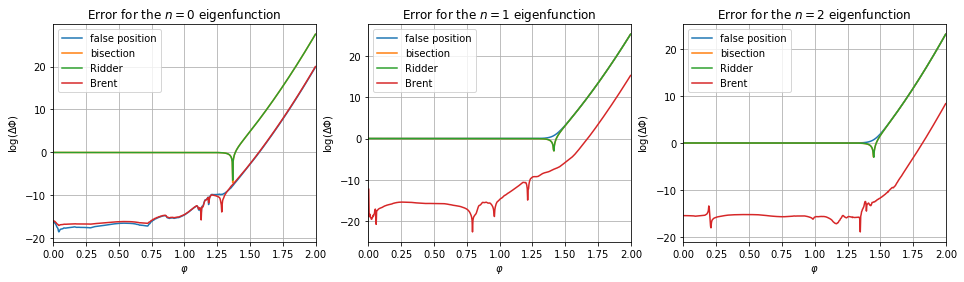

In [39]:
# Analytic solutions for n = 0,1,2
analytic_0 = analytic_solution(0, field[:600])
analytic_1 = analytic_solution(1, field[:600])
analytic_2 = analytic_solution(2, field[:600])

# Calculates log of errors
error_false_position_0 = np.log(abs((V_false_position_0 - analytic_0)/analytic_0))
error_false_position_1 = np.log(abs((V_false_position_1 - analytic_1)/analytic_1))
error_false_position_2 = np.log(abs((V_false_position_2 - analytic_2)/analytic_2))
error_bisect_0 = np.log(abs((V_bisect_0 - analytic_0)/analytic_0))
error_bisect_1 = np.log(abs((V_bisect_1 - analytic_1)/analytic_1))
error_bisect_2 = np.log(abs((V_bisect_2 - analytic_2)/analytic_2))
error_ridder_0 = np.log(abs((V_ridder_0 - analytic_0)/analytic_0))
error_ridder_1 = np.log(abs((V_ridder_1 - analytic_1)/analytic_1))
error_ridder_2 = np.log(abs((V_ridder_2 - analytic_2)/analytic_2))
error_brent_0 = np.log(abs((V_brent_0 - analytic_0)/analytic_0))
error_brent_1 = np.log(abs((V_brent_1 - analytic_1)/analytic_1))
error_brent_2 = np.log(abs((V_brent_2 - analytic_2)/analytic_2))

# Plotting error
fig = plt.figure(figsize=(16, 4))

# n = 0 eigenfunction
ax0 = fig.add_subplot(1,3,1)
ax0.grid()
ax0.set_title("Error for the $n=0$ eigenfunction")
ax0.set_ylabel("log($\Delta\Phi$)")
ax0.set_xlabel("$\\varphi$")
ax0.set_xlim(0, 2)
ax0.plot(field[:600], error_false_position_0, label="false position")
ax0.plot(field[:600], error_bisect_0, label="bisection")
ax0.plot(field[:600], error_ridder_0, label="Ridder")
ax0.plot(field[:600], error_brent_0, label="Brent")
ax0.legend()

# n = 1 eigenfunction
ax1 = fig.add_subplot(1,3,2)
ax1.grid()
ax1.set_title("Error for the $n=1$ eigenfunction")
ax1.set_ylabel("log($\Delta\Phi$)")
ax1.set_xlabel("$\\varphi$")
ax1.set_xlim(0, 2)
ax1.plot(field[:600], error_false_position_1, label="false position")
ax1.plot(field[:600], error_bisect_1, label="bisection")
ax1.plot(field[:600], error_ridder_1, label="Ridder")
ax1.plot(field[:600], error_brent_1, label="Brent")
ax1.legend()

# n = 2 eigenfunction
ax2 = fig.add_subplot(1,3,3)
ax2.grid()
ax2.set_title("Error for the $n=2$ eigenfunction")
ax2.set_ylabel("log($\Delta\Phi$)")
ax2.set_xlabel("$\\varphi$")
ax2.set_xlim(0, 2)
ax2.plot(field[:600], error_false_position_2, label="false position")
ax2.plot(field[:600], error_bisect_2, label="bisection")
ax2.plot(field[:600], error_ridder_2, label="Ridder")
ax2.plot(field[:600], error_brent_2, label="Brent")
ax2.legend()

In [40]:
class eigenfunction_finder:
    '''Class for finding the eigenfunction for a given eigenvalue'''
    def __init__(self, V, field):
        '''Initialises the range of field values for which the field is
        to be integrated
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        field: field values'''
        self.V = V
        self.field = field        
 
    def effective_potential(self, field):
        '''Defines the effective potential in the SL equation'''
    
        W = mass_squared*((2*np.pi**2)/(3*hubble_rate**4))*(((4*np.pi**2)/(3*hubble_rate**4))*mass_squared*field**2 - 1)
        return W


    def schrodinger_like_ODE(self, V, field):
        '''Computes the derivatives of the Schrodinger-like equation'''

        # Empty array for derivatives
        dV = np.zeros(2)
        # Computes derivatives
        dV[0] = V[1]
        dV[1] = V[0]*(2*self.effective_potential(field) - (8*self.eigenvalue*np.pi**2)/(hubble_rate**3))
        return dV    

    def eigenfunction(self, eigenvalue):
        '''Integrates the eigenfunction for the field based on the given
        field range and returns the projected solution based on the
        eigenvalue'''
        
        self.eigenvalue = eigenvalue
        
        # Integrates to find eigenfunction
        V = odeint(self.schrodinger_like_ODE, self.V, self.field)

        return V[-1,0]
    
    def eigenfunction_full(self, eigenvalue):
        '''Integrates the eigenfunction for the field based on the given
        field range and returns the projected solution based on the
        eigenvalue'''
        
        self.eigenvalue = eigenvalue
        
        # Integrates to find eigenfunction
        V = odeint(self.schrodinger_like_ODE, self.V, self.field)

        return V[:,0]

In [41]:
# Field 
field = np.linspace(0, 10, 3000)

# Scipy implementations of the bisection/Ridders/Brent algoritms for n = 0
eigenvalue_function = eigenfunction_finder(V_even, field)
scipy_bisect_0, results_bisect_0 = optimize.bisect(eigenvalue_function.eigenfunction,-0.1, 0.2, full_output=True, xtol=1e-6)
scipy_bisect_V_0 = eigenvalue_function.eigenfunction_full(scipy_bisect_0)
scipy_ridder_0, results_ridder_0 = optimize.ridder(eigenvalue_function.eigenfunction,-0.1, 0.2, full_output=True, xtol=1e-6)
scipy_ridder_V_0 = eigenvalue_function.eigenfunction_full(scipy_ridder_0)
scipy_brent_0, results_brent_0 = optimize.brentq(eigenvalue_function.eigenfunction,-0.1, 0.2, full_output=True, xtol=1e-6)
scipy_brent_V_0 = eigenvalue_function.eigenfunction_full(scipy_brent_0)

# Scipy implementations of the bisection/Ridders/Brent algoritms for n = 1
eigenvalue_function = eigenfunction_finder(V_odd, field)
scipy_bisect_1, results_bisect_1 = optimize.bisect(eigenvalue_function.eigenfunction,0.1, 0.5, full_output=True, xtol=1e-6)
scipy_bisect_V_1 = eigenvalue_function.eigenfunction_full(scipy_bisect_1)
scipy_ridder_1, results_ridder_1 = optimize.ridder(eigenvalue_function.eigenfunction,0.1, 0.5, full_output=True, xtol=1e-6)
scipy_ridder_V_1 = eigenvalue_function.eigenfunction_full(scipy_ridder_1)
scipy_brent_1, results_brent_1 = optimize.brentq(eigenvalue_function.eigenfunction,0.1, 0.5, full_output=True, xtol=1e-6)
scipy_brent_V_1 = eigenvalue_function.eigenfunction_full(scipy_brent_1)

# Scipy implementations of the bisection/Ridders/Brent algoritms for n = 2
eigenvalue_function = eigenfunction_finder(V_even, field)
scipy_bisect_2, results_bisect_2 = optimize.bisect(eigenvalue_function.eigenfunction,0.4, 0.7, full_output=True, xtol=1e-6)
scipy_bisect_V_2 = eigenvalue_function.eigenfunction_full(scipy_bisect_2)
scipy_ridder_2, results_ridder_2 = optimize.ridder(eigenvalue_function.eigenfunction,0.4, 0.7, full_output=True, xtol=1e-6)
scipy_ridder_V_2 = eigenvalue_function.eigenfunction_full(scipy_ridder_2)
scipy_brent_2, results_brent_2 = optimize.brentq(eigenvalue_function.eigenfunction,0.4, 0.7, full_output=True, xtol=1e-6)
scipy_brent_V_2 = eigenvalue_function.eigenfunction_full(scipy_brent_2)

In [42]:
print(results_bisect_0)
print(results_ridder_0)
print(results_brent_0)

      converged: True
           flag: 'converged'
 function_calls: 21
     iterations: 19
           root: 1.907348632905019e-07
      converged: True
           flag: 'converged'
 function_calls: 40
     iterations: 19
           root: 1.907348632905019e-07
      converged: True
           flag: 'converged'
 function_calls: 15
     iterations: 14
           root: 8.592549728177393e-08


In [43]:
print(results_bisect_1)
print(results_ridder_1)
print(results_brent_1)

      converged: True
           flag: 'converged'
 function_calls: 21
     iterations: 19
           root: 0.3333335876464844
      converged: True
           flag: 'converged'
 function_calls: 40
     iterations: 19
           root: 0.3333335876464844
      converged: True
           flag: 'converged'
 function_calls: 13
     iterations: 12
           root: 0.33333336124233004


In [44]:
print(results_bisect_2)
print(results_ridder_2)
print(results_brent_2)

      converged: True
           flag: 'converged'
 function_calls: 21
     iterations: 19
           root: 0.6666662216186523
      converged: True
           flag: 'converged'
 function_calls: 40
     iterations: 19
           root: 0.6666662216186523
      converged: True
           flag: 'converged'
 function_calls: 17
     iterations: 16
           root: 0.6666668093082068


In [45]:
# Normalisation constants n = 0
N_bisect_0 = np.sqrt(2*simps(scipy_bisect_V_0[:600]**2, field[:600], dphi))
N_ridder_0 = np.sqrt(2*simps(scipy_ridder_V_0[:600]**2, field[:600], dphi))
N_brent_0 = np.sqrt(2*simps(scipy_brent_V_0[:600]**2, field[:600], dphi))

# Normalisation n = 0
scipy_bisect_V_0 = scipy_bisect_V_0[:600]/N_bisect_0
scipy_ridder_V_0 = scipy_ridder_V_0[:600]/N_ridder_0
scipy_brent_V_0 = scipy_brent_V_0[:600]/N_brent_0

# Normalisation constants n = 1
N_bisect_1 = np.sqrt(2*simps(scipy_bisect_V_1[:600]**2, field[:600], dphi))
N_ridder_1 = np.sqrt(2*simps(scipy_ridder_V_1[:600]**2, field[:600], dphi))
N_brent_1 = np.sqrt(2*simps(scipy_brent_V_1[:600]**2, field[:600], dphi))

# Normalisation n = 1
scipy_bisect_V_1 = scipy_bisect_V_1[:600]/N_bisect_1
scipy_ridder_V_1 = scipy_ridder_V_1[:600]/N_ridder_1
scipy_brent_V_1 = scipy_brent_V_1[:600]/N_brent_1

# Normalisation constants n = 2
N_bisect_2 = -np.sqrt(2*simps(scipy_bisect_V_2[:600]**2, field[:600], dphi))
N_ridder_2 = -np.sqrt(2*simps(scipy_ridder_V_2[:600]**2, field[:600], dphi))
N_brent_2 = -np.sqrt(2*simps(scipy_brent_V_2[:600]**2, field[:600], dphi))

# Normalisation n = 2
scipy_bisect_V_2 = scipy_bisect_V_2[:600]/N_bisect_2
scipy_ridder_V_2 = scipy_ridder_V_2[:600]/N_ridder_2
scipy_brent_V_2 = scipy_brent_V_2[:600]/N_brent_2

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


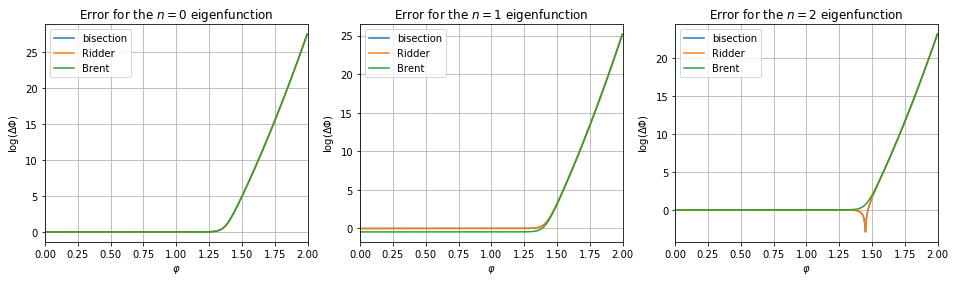

In [46]:
# Analytic solutions for n = 0,1,2
analytic_0 = analytic_solution(0, field[:600])
analytic_1 = analytic_solution(1, field[:600])
analytic_2 = analytic_solution(2, field[:600])

# Calculates log of errors
scipy_error_bisect_0 = np.log(abs((scipy_bisect_V_0 - analytic_0)/analytic_0))
scipy_error_bisect_1 = np.log(abs((scipy_bisect_V_1 - analytic_1)/analytic_1))
scipy_error_bisect_2 = np.log(abs((scipy_bisect_V_2 - analytic_2)/analytic_2))
scipy_error_ridder_0 = np.log(abs((scipy_ridder_V_0 - analytic_0)/analytic_0))
scipy_error_ridder_1 = np.log(abs((scipy_ridder_V_1 - analytic_1)/analytic_1))
scipy_error_ridder_2 = np.log(abs((scipy_ridder_V_2 - analytic_2)/analytic_2))
scipy_error_brent_0 = np.log(abs((scipy_brent_V_0 - analytic_0)/analytic_0))
scipy_error_brent_1 = np.log(abs((scipy_brent_V_1 - analytic_1)/analytic_1))
scipy_error_brent_2 = np.log(abs((scipy_brent_V_2 - analytic_2)/analytic_2))

# Plotting error
fig = plt.figure(figsize=(16, 4))

# n = 0 eigenfunction
ax0 = fig.add_subplot(1,3,1)
ax0.grid()
ax0.set_title("Error for the $n=0$ eigenfunction")
ax0.set_ylabel("log($\Delta\Phi$)")
ax0.set_xlabel("$\\varphi$")
ax0.set_xlim(0, 2)
ax0.plot(field[:600], scipy_error_bisect_0, label="bisection")
ax0.plot(field[:600], scipy_error_ridder_0, label="Ridder")
ax0.plot(field[:600], scipy_error_brent_0, label="Brent")
ax0.legend()

# n = 1 eigenfunction
ax1 = fig.add_subplot(1,3,2)
ax1.grid()
ax1.set_title("Error for the $n=1$ eigenfunction")
ax1.set_ylabel("log($\Delta\Phi$)")
ax1.set_xlabel("$\\varphi$")
ax1.set_xlim(0, 2)
ax1.plot(field[:600], scipy_error_bisect_1, label="bisection")
ax1.plot(field[:600], scipy_error_ridder_1, label="Ridder")
ax1.plot(field[:600], scipy_error_brent_1, label="Brent")
ax1.legend()

# n = 2 eigenfunction
ax2 = fig.add_subplot(1,3,3)
ax2.grid()
ax2.set_title("Error for the $n=2$ eigenfunction")
ax2.set_ylabel("log($\Delta\Phi$)")
ax2.set_xlabel("$\\varphi$")
ax2.set_xlim(0, 2)
ax2.plot(field[:600], scipy_error_bisect_2, label="bisection")
ax2.plot(field[:600], scipy_error_ridder_2, label="Ridder")
ax2.plot(field[:600], scipy_error_brent_2, label="Brent")
ax2.legend()

Here we compare the implentation of the various algorithms with their Scipy implementations. We plot the error as
$$\log\left(\frac{\Delta \Phi_{loop}}{\Delta \Phi_{scipy}}\right). $$

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


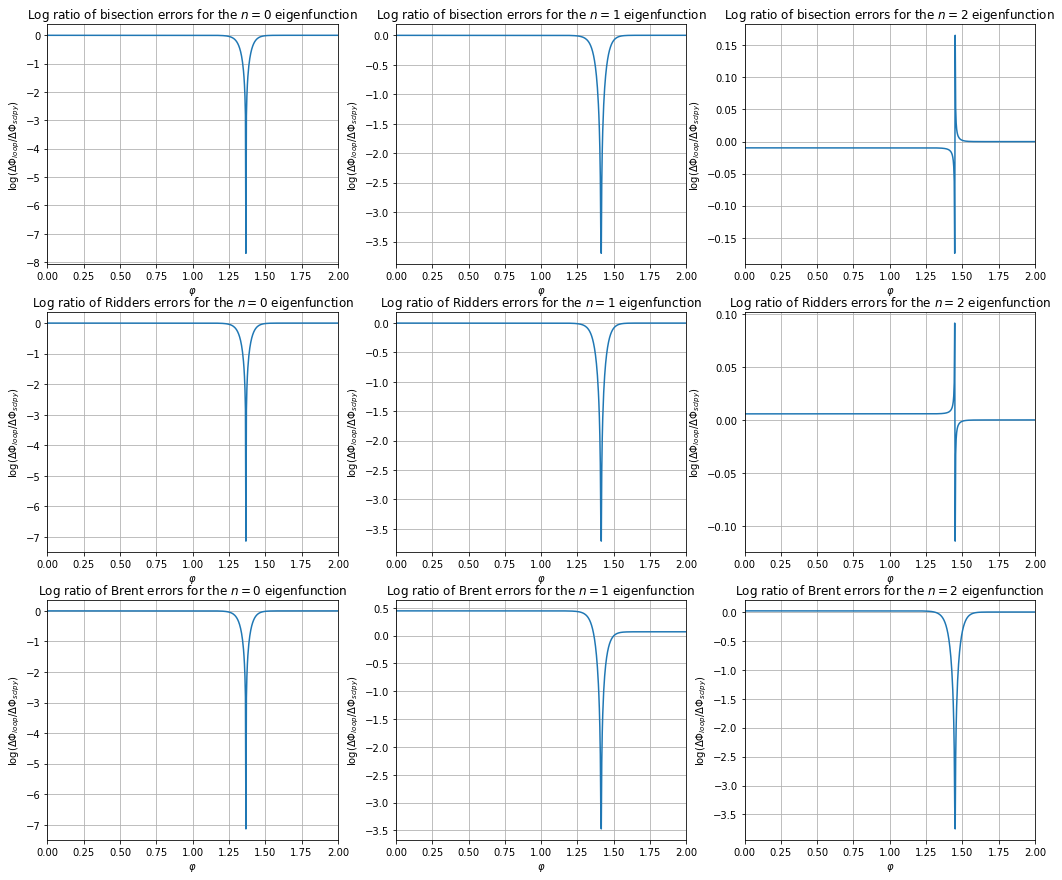

In [47]:
# Analytic solutions for n = 0,1,2
analytic_0 = analytic_solution(0, field[:600])
analytic_1 = analytic_solution(1, field[:600])
analytic_2 = analytic_solution(2, field[:600])

# Calculates log of errors
error_bisect_0 = abs((V_bisect_0 - analytic_0)/analytic_0)
error_ridder_0 = abs((V_ridder_0 - analytic_0)/analytic_0)
error_brent_0 = abs((V_brent_0 - analytic_0)/analytic_0)
error_bisect_1 = abs((V_bisect_1 - analytic_1)/analytic_1)
error_ridder_1 = abs((V_ridder_1 - analytic_1)/analytic_1)
error_brent_1 = abs((V_brent_1 - analytic_1)/analytic_1)
error_bisect_2 = abs((V_bisect_2 - analytic_2)/analytic_2)
error_ridder_2 = abs((V_ridder_2 - analytic_2)/analytic_2)
error_brent_2 = abs((V_brent_2 - analytic_2)/analytic_2)

# Calculates log of errors
error_ratio_bisect_0 = np.log(error_bisect_0/(abs((scipy_bisect_V_0 - analytic_0)/analytic_0)))
error_ratio_ridder_0 = np.log(error_ridder_0/(abs((scipy_ridder_V_0 - analytic_0)/analytic_0)))
error_ratio_brent_0 = np.log(error_ridder_0/(abs((scipy_brent_V_0 - analytic_0)/analytic_0)))
error_ratio_bisect_1 = np.log(error_bisect_1/(abs((scipy_bisect_V_1 - analytic_1)/analytic_1)))
error_ratio_ridder_1 = np.log(error_ridder_1/(abs((scipy_ridder_V_1 - analytic_1)/analytic_1)))
error_ratio_brent_1 = np.log(error_ridder_1/(abs((scipy_brent_V_1 - analytic_1)/analytic_1)))
error_ratio_bisect_2 = np.log(error_bisect_2/(abs((scipy_bisect_V_2 - analytic_2)/analytic_2)))
error_ratio_ridder_2 = np.log(error_ridder_2/(abs((scipy_ridder_V_2 - analytic_2)/analytic_2)))
error_ratio_brent_2 = np.log(error_ridder_2/(abs((scipy_brent_V_2 - analytic_2)/analytic_2)))

# Plotting error
fig = plt.figure(figsize=(17.7, 15))

## Bisection
# n = 0 eigenfunction
ax0 = fig.add_subplot(3,3,1)
ax0.grid()
ax0.set_title("Log ratio of bisection errors for the $n=0$ eigenfunction")
ax0.set_ylabel("log($\Delta\Phi_{loop}/\Delta\Phi_{scipy}$)")
ax0.set_xlabel("$\\varphi$")
ax0.set_xlim(0, 2)
ax0.plot(field[:600], error_ratio_bisect_0)

# n = 1 eigenfunction
ax1 = fig.add_subplot(3,3,2)
ax1.grid()
ax1.set_title("Log ratio of bisection errors for the $n=1$ eigenfunction")
ax1.set_ylabel("log($\Delta\Phi_{loop}/\Delta\Phi_{scipy}$)")
ax1.set_xlabel("$\\varphi$")
ax1.set_xlim(0, 2)
ax1.plot(field[:600], error_ratio_bisect_1)

# n = 2 eigenfunction
ax2 = fig.add_subplot(3,3,3)
ax2.grid()
ax2.set_title("Log ratio of bisection errors for the $n=2$ eigenfunction")
ax2.set_ylabel("log($\Delta\Phi_{loop}/\Delta\Phi_{scipy}$)")
ax2.set_xlabel("$\\varphi$")
ax2.set_xlim(0, 2)
ax2.plot(field[:600], error_ratio_bisect_2)

## Ridder
# n = 0 eigenfunction
ax3 = fig.add_subplot(3,3,4)
ax3.grid()
ax3.set_title("Log ratio of Ridders errors for the $n=0$ eigenfunction")
ax3.set_ylabel("log($\Delta\Phi_{loop}/\Delta\Phi_{scipy}$)")
ax3.set_xlabel("$\\varphi$")
ax3.set_xlim(0, 2)
ax3.plot(field[:600], error_ratio_ridder_0)

# n = 1 eigenfunction
ax4 = fig.add_subplot(3,3,5)
ax4.grid()
ax4.set_title("Log ratio of Ridders errors for the $n=1$ eigenfunction")
ax4.set_ylabel("log($\Delta\Phi_{loop}/\Delta\Phi_{scipy}$)")
ax4.set_xlabel("$\\varphi$")
ax4.set_xlim(0, 2)
ax4.plot(field[:600], error_ratio_ridder_1)

# n = 2 eigenfunction
ax5 = fig.add_subplot(3,3,6)
ax5.grid()
ax5.set_title("Log ratio of Ridders errors for the $n=2$ eigenfunction")
ax5.set_ylabel("log($\Delta\Phi_{loop}/\Delta\Phi_{scipy}$)")
ax5.set_xlabel("$\\varphi$")
ax5.set_xlim(0, 2)
ax5.plot(field[:600], error_ratio_ridder_2)

## Brent
# n = 0 eigenfunction
ax6 = fig.add_subplot(3,3,7)
ax6.grid()
ax6.set_title("Log ratio of Brent errors for the $n=0$ eigenfunction")
ax6.set_ylabel("log($\Delta\Phi_{loop}/\Delta\Phi_{scipy}$)")
ax6.set_xlabel("$\\varphi$")
ax6.set_xlim(0, 2)
ax6.plot(field[:600], error_ratio_brent_0)

# n = 1 eigenfunction
ax7 = fig.add_subplot(3,3,8)
ax7.grid()
ax7.set_title("Log ratio of Brent errors for the $n=1$ eigenfunction")
ax7.set_ylabel("log($\Delta\Phi_{loop}/\Delta\Phi_{scipy}$)")
ax7.set_xlabel("$\\varphi$")
ax7.set_xlim(0, 2)
ax7.plot(field[:600], error_ratio_brent_1)

# n = 2 eigenfunction
ax8 = fig.add_subplot(3,3,9)
ax8.grid()
ax8.set_title("Log ratio of Brent errors for the $n=2$ eigenfunction")
ax8.set_ylabel("log($\Delta\Phi_{loop}/\Delta\Phi_{scipy}$)")
ax8.set_xlabel("$\\varphi$")
ax8.set_xlim(0, 2)
ax8.plot(field[:600], error_ratio_brent_2)